In [3]:
import pandas as pd
import empath
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [20]:
subreddit_control = 'ukraine'
type_of_content = 'submissions'

conspiracy_file = open(f"./data/conspiracy.txt", "r")
conspiracy_words = conspiracy_file.read().split("\n")

control_file = open(f"./data/ukraine.txt", "r")
control_words = control_file.read().split("\n")
categories = ['help', 'money', 'medical_emergency', 'cold', 'hate', 'cheerfulness', 'aggression', 'occupation', 'envy', 'anticipation', 'family', 'crime', 'prison', 'health', 'dispute', 'nervousness', 'government', 'weakness', 'horror', 'swearing_terms', 'leisure', 'suffering', 'journalism', 'social_media', 'kill', 'ridicule', 'optimism', 'home', 'fear', 'irritability', 'business', 'exasperation', 'religion', 'internet', 'surprise', 'worship', 'leader', 'independence', 'zest', 'confusion', 'death', 'heroic', 'violence', 'dominant_heirarchical', 'military', 'neglect', 'love', 'communication', 'order', 'sympathy', 'anonymity', 'trust', 'deception', 'fight', 'dominant_personality', 'meeting', 'war', 'speaking', 'disgust', 'gain', 'injury', 'rage', 'science', 'appearance', 'warmth', 'sadness', 'emotional', 'joy', 'affection', 'shame', 'torment', 'economics', 'anger', 'politics', 'strength', 'technology', 'breaking', 'power', 'terrorism', 'disappointment', 'poor', 'pain', 'philosophy', 'negative_emotion', 'friends', 'achievement', 'weapon', 'children', 'giving', 'contentment', 'positive_emotion']


In [30]:
def plotHotTopics(words, subreddit):
    lexicon = empath.Empath()
    empath_results = lexicon.analyze(words, normalize=True, categories=categories)
    empath_results_sorted = sorted(empath_results.items(), key=lambda x: x[1], reverse=True)

    plt.figure(figsize = (14, 14))

    top_ten = dict(list(empath_results_sorted)[:30])
    labels = list(top_ten.keys())
    values = list(top_ten.values())
    ax = sns.barplot(x=labels, y=values)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.title(f"Most prevalent lexical categories in r/{subreddit}")
    plt.xlabel("top categories")
    plt.ylabel("proportion") #better label
    plt.savefig(f"./images/empath/{subreddit}_empath_{type_of_content}.png")
    return empath_results


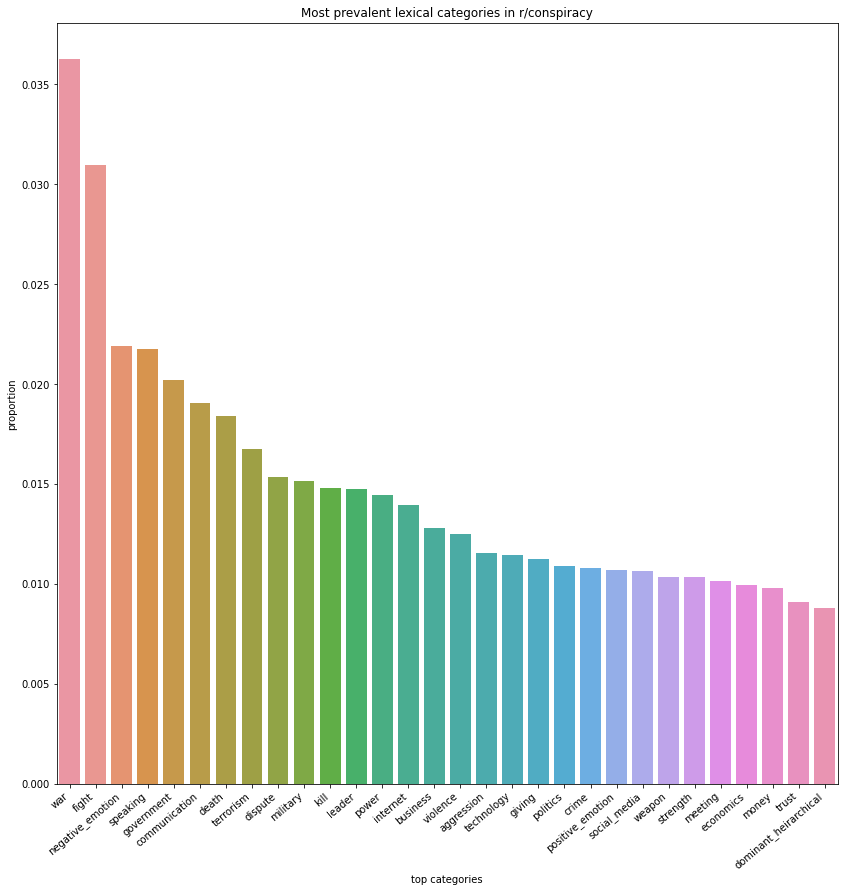

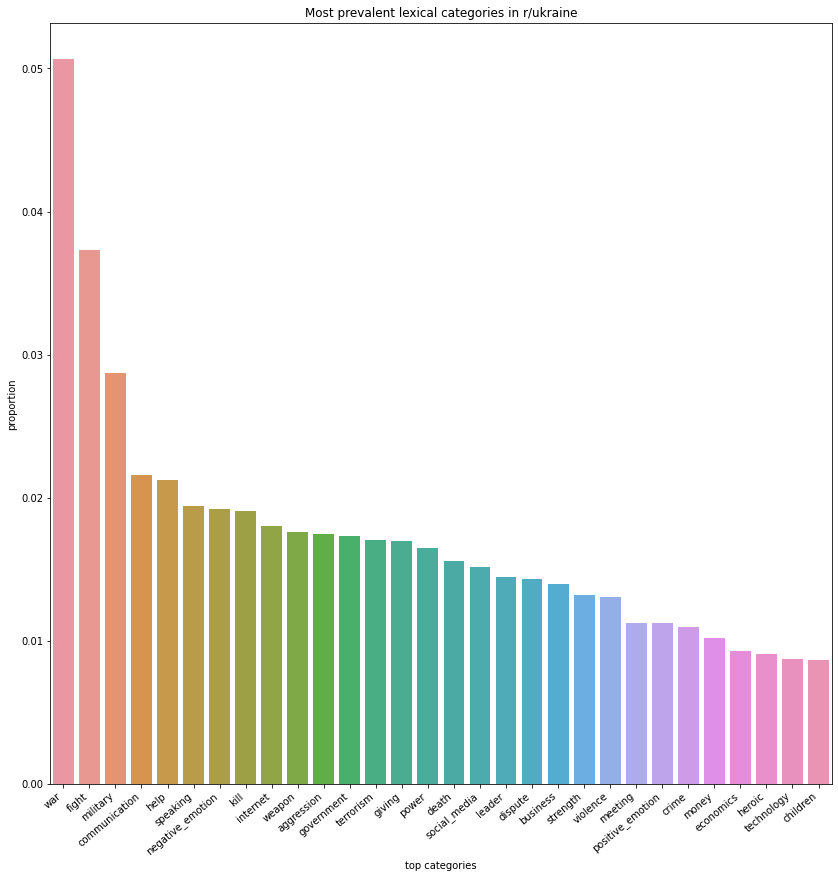

In [31]:
conspiracy_empath = plotHotTopics(conspiracy_words, 'conspiracy')
control_empath = plotHotTopics(control_words, subreddit_control)

0.08665572742080765
[('help', -0.4293875656315371), ('military', -0.30959944736405687), ('cheerfulness', -0.271845867665275), ('family', -0.2692063172547326), ('warmth', -0.26312197552052363), ('weapon', -0.25906963144151673), ('home', -0.25568297382894023), ('exasperation', -0.2382375204860118), ('aggression', -0.20409413450385386), ('giving', -0.20252842778721916), ('hate', 0.2157562120941908), ('gain', 0.2233376376482187), ('ridicule', 0.2709070682985476), ('emotional', 0.2785023403091513), ('religion', 0.29057661271435054), ('envy', 0.33796521838686167), ('health', 0.3430663222001235), ('dominant_personality', 0.37440922197022675), ('philosophy', 0.39069684945888), ('surprise', 0.39171583868360066), ('deception', 0.42629612399319883), ('science', 0.4697208763762538)]


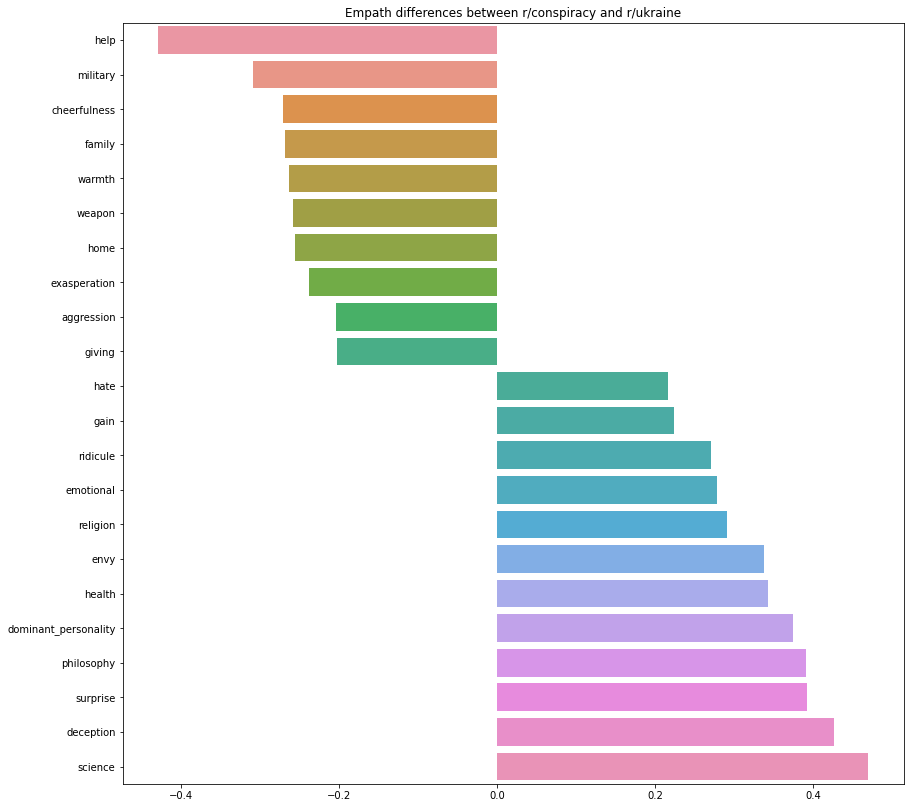

In [35]:
pooled_standard_dev = np.sqrt((np.std(list(conspiracy_empath.values())) + np.std(list(control_empath.values()))) / 2)
print(pooled_standard_dev)


differences = {}
assorted_diffs = {}
for key in conspiracy_empath:
    differences[key] = (conspiracy_empath[key] - control_empath[key]) / (conspiracy_empath[key] + control_empath[key])
    
for (key, value) in differences.items():
   if abs(value) > 0.2:
       assorted_diffs[key] = value

differences_sorted = sorted(assorted_diffs.items(), key=lambda x: x[1])
print(differences_sorted)

figure = plt.figure(figsize = (14, 14))

#top_ten = dict(list(differences_sorted)[:5] + list(differences_sorted[-5:]))
top_ten = dict(list(differences_sorted))
labels = list(top_ten.keys())
values = list(top_ten.values())
ax = sns.barplot(x=values, y=labels)
plt.title(f"Empath differences between r/conspiracy and r/{subreddit_control}")
plt.savefig(f"./images/empath/empath_differences_conspiracy_{subreddit_control}_{type_of_content}.png")
